# Matches Leaderboard - Descriptive Analysis
**Dataset**: 5,000 anonymized player entries  
**Category**: Matches  
**Focus**: Distributions, correlations, and patterns

In [13]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Load data
df = pd.read_parquet('../data/processed/leaderboard_full.parquet')
matches = df[df['category'] == 'matches'].copy()

print(f"Loaded {len(matches):,} players")
matches.head()

Loaded 5,000 players


,category,player_id,position,matches,wins,losses,wl_ratio,ties,kills,deaths,killstreak,damage_dealt,arrows_shot,arrows_hit
0,matches,player_d6a1348e4db2,#1,27737.0,10628.0,17103.0,0.62,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,matches,player_cafecb0f80e7,#2,19327.0,9978.0,9330.0,1.07,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2,matches,player_93a90542cb77,#3,16934.0,6803.0,10126.0,0.67,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,matches,player_1a18a74e7e74,#4,16841.0,7423.0,9376.0,0.79,42.0,NaN,NaN,NaN,NaN,NaN,NaN
4,matches,player_910764e5a178,#5,16757.0,10138.0,6606.0,1.53,13.0,NaN,NaN,NaN,NaN,NaN,NaN


## 1. Distribution of Total Matches Played

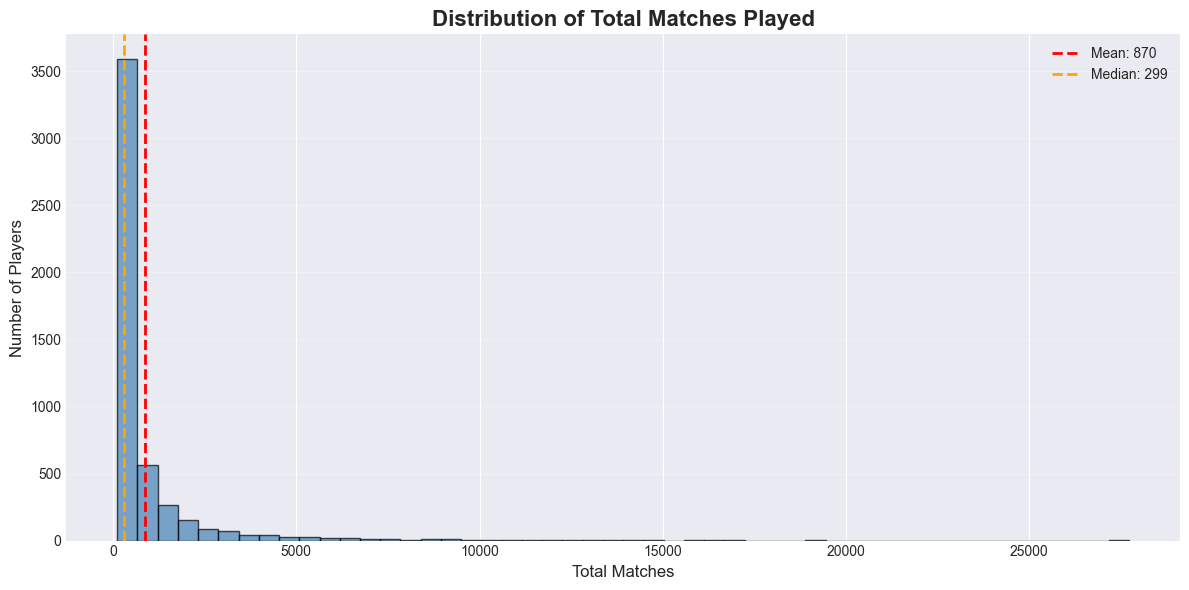

Mean: 870.27
Median: 299.00
Std Dev: 1689.32


In [14]:
plt.figure(figsize=(12, 6))
plt.hist(matches['matches'], bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.axvline(matches['matches'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {matches["matches"].mean():.0f}')
plt.axvline(matches['matches'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {matches["matches"].median():.0f}')
plt.title('Distribution of Total Matches Played', fontsize=16, fontweight='bold')
plt.xlabel('Total Matches', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Mean: {matches['matches'].mean():.2f}")
print(f"Median: {matches['matches'].median():.2f}")
print(f"Std Dev: {matches['matches'].std():.2f}")

## 2. Win/Loss Ratio Distribution

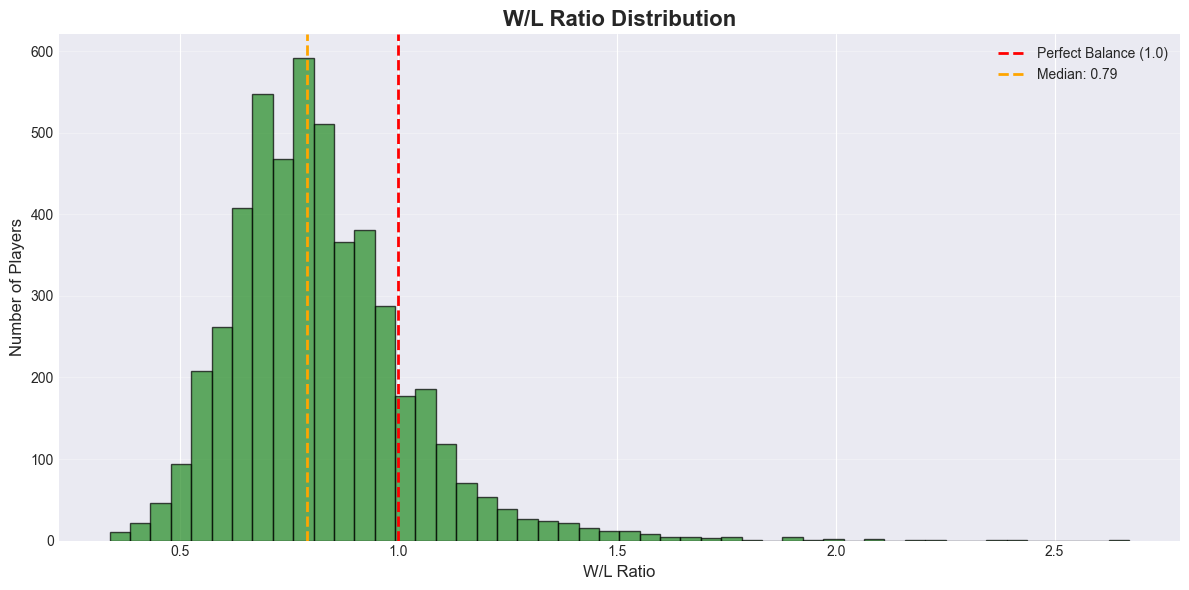

Players with W/L > 1.0: 742 (14.8%)
Players with W/L < 1.0: 4201 (84.0%)


In [15]:
# Remove extreme outliers for better visualization
wl_clean = matches['wl_ratio'][matches['wl_ratio'] < 5]

plt.figure(figsize=(12, 6))
plt.hist(wl_clean, bins=50, alpha=0.7, color='forestgreen', edgecolor='black')
plt.axvline(1.0, color='red', linestyle='--', linewidth=2, label='Perfect Balance (1.0)')
plt.axvline(wl_clean.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {wl_clean.median():.2f}')
plt.title('W/L Ratio Distribution', fontsize=16, fontweight='bold')
plt.xlabel('W/L Ratio', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Players with W/L > 1.0: {(matches['wl_ratio'] > 1.0).sum()} ({(matches['wl_ratio'] > 1.0).mean()*100:.1f}%)")
print(f"Players with W/L < 1.0: {(matches['wl_ratio'] < 1.0).sum()} ({(matches['wl_ratio'] < 1.0).mean()*100:.1f}%)")

## 3. Wins vs Losses Scatter Plot with Regression

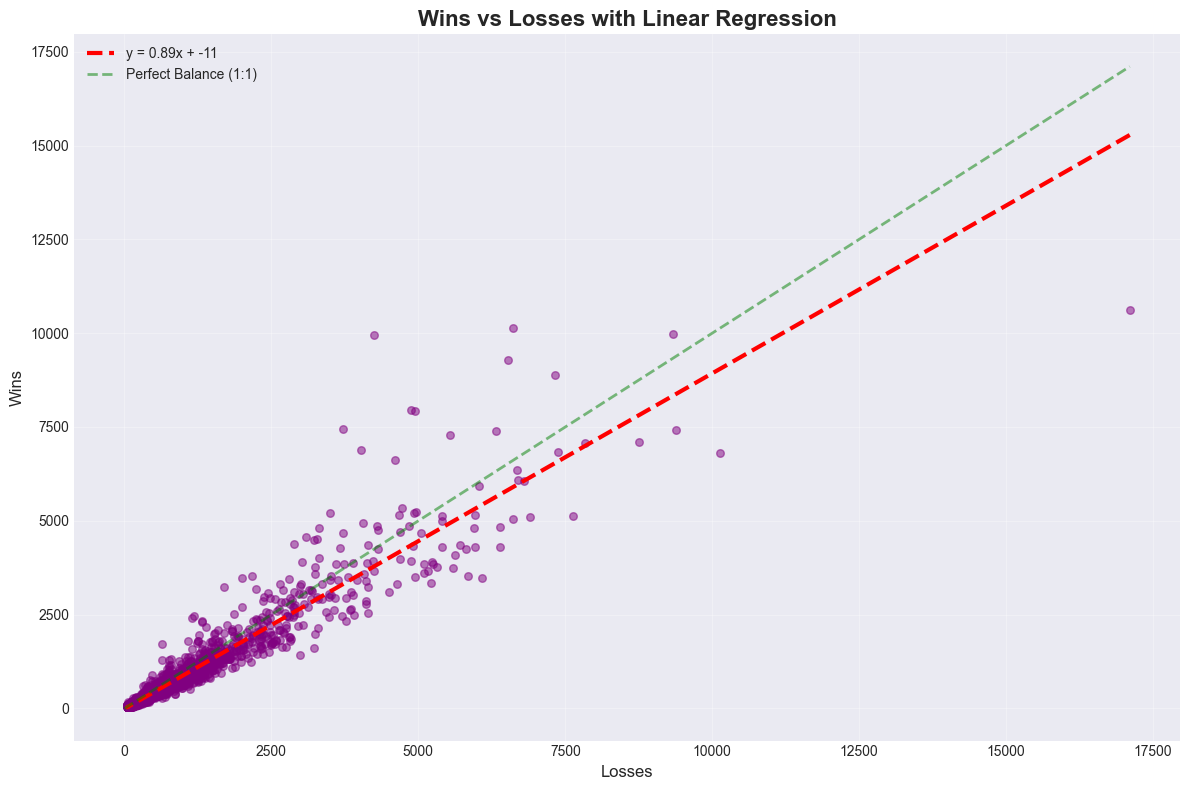

Correlation: 0.951


In [16]:
plt.figure(figsize=(12, 8))
plt.scatter(matches['losses'], matches['wins'], alpha=0.5, s=30, c='purple')

# Linear regression
z = np.polyfit(matches['losses'], matches['wins'], 1)
p = np.poly1d(z)
plt.plot(matches['losses'], p(matches['losses']), "r--", linewidth=3, label=f'y = {z[0]:.2f}x + {z[1]:.0f}')

# Perfect balance line
max_val = max(matches['losses'].max(), matches['wins'].max())
plt.plot([0, max_val], [0, max_val], 'g--', linewidth=2, alpha=0.5, label='Perfect Balance (1:1)')

plt.title('Wins vs Losses with Linear Regression', fontsize=16, fontweight='bold')
plt.xlabel('Losses', fontsize=12)
plt.ylabel('Wins', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
corr = matches[['wins', 'losses']].corr().iloc[0, 1]
print(f"Correlation: {corr:.3f}")

## 4. Total Matches vs W/L Ratio

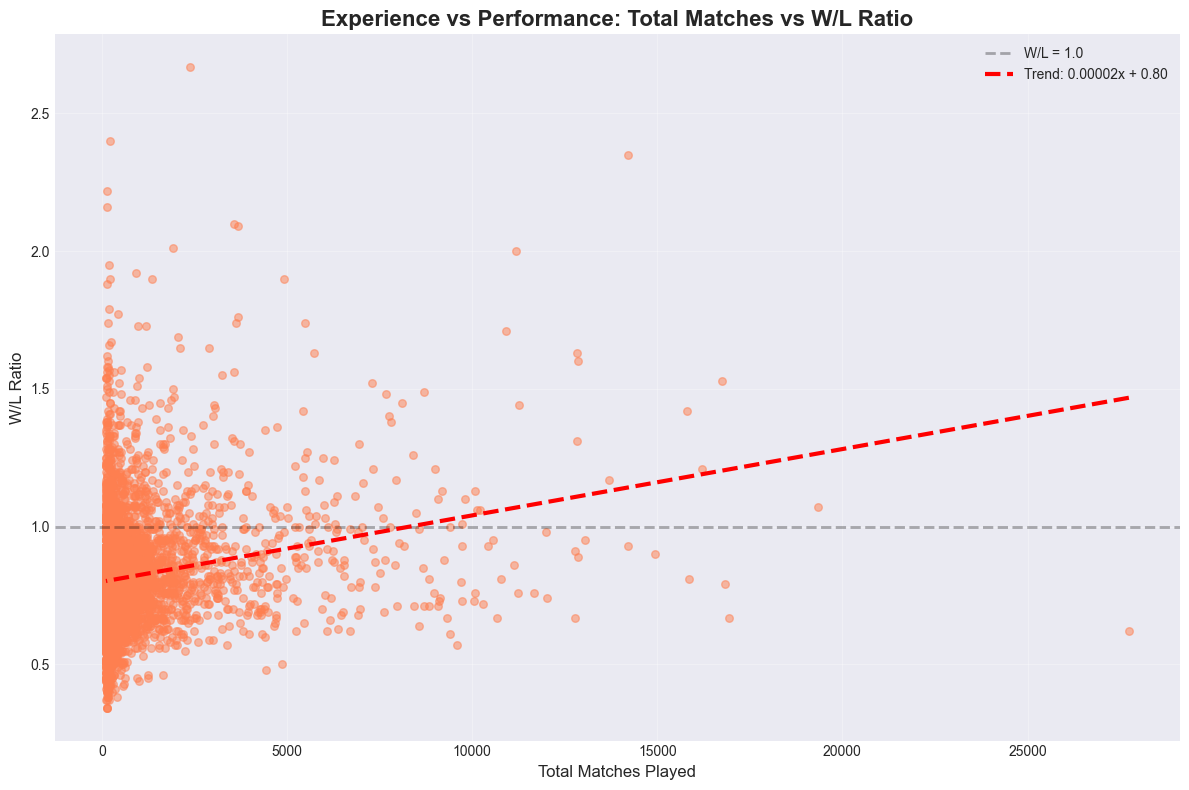

Correlation: 0.195


In [17]:
# Remove extreme outliers
mask = matches['wl_ratio'] < 5
plot_data = matches[mask]

plt.figure(figsize=(12, 8))
plt.scatter(plot_data['matches'], plot_data['wl_ratio'], alpha=0.5, s=30, c='coral')
plt.axhline(1.0, color='black', linestyle='--', linewidth=2, alpha=0.3, label='W/L = 1.0')

# Trend line
z = np.polyfit(plot_data['matches'], plot_data['wl_ratio'], 1)
p = np.poly1d(z)
plt.plot(plot_data['matches'], p(plot_data['matches']), "r--", linewidth=3, label=f'Trend: {z[0]:.5f}x + {z[1]:.2f}')

plt.title('Experience vs Performance: Total Matches vs W/L Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Total Matches Played', fontsize=12)
plt.ylabel('W/L Ratio', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

corr = plot_data[['matches', 'wl_ratio']].corr().iloc[0, 1]
print(f"Correlation: {corr:.3f}")

## 5. Box Plot: Wins, Losses, Ties Comparison

C:\Users\ofurn\AppData\Local\Temp\ipykernel_20112\704537951.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(data_to_plot, labels=['Wins', 'Losses', 'Ties'], patch_artist=True)


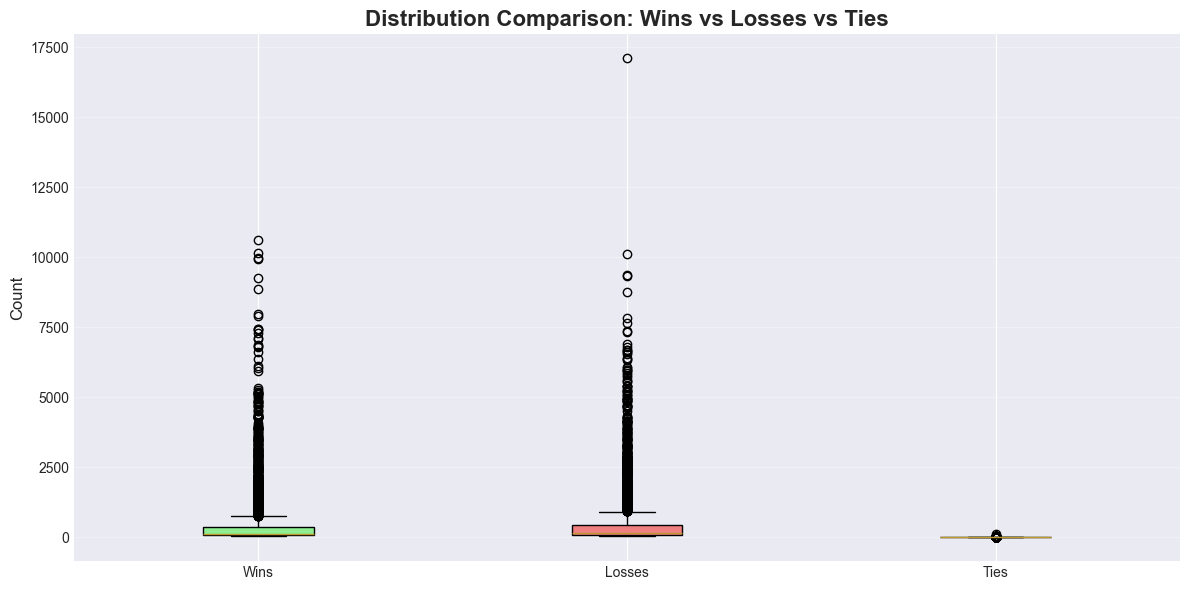

Summary Statistics:
               wins        losses         ties
count   5000.000000   5000.000000  5000.000000
mean     404.618600    464.992000     0.662800
std      828.091464    881.072713     3.130472
min       32.000000     45.000000     0.000000
25%       71.000000     92.000000     0.000000
50%      131.000000    167.000000     0.000000
75%      349.000000    422.000000     0.000000
max    10628.000000  17103.000000   126.000000


In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

data_to_plot = [matches['wins'], matches['losses'], matches['ties']]
box = ax.boxplot(data_to_plot, labels=['Wins', 'Losses', 'Ties'], patch_artist=True)

colors = ['lightgreen', 'lightcoral', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Distribution Comparison: Wins vs Losses vs Ties', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Summary Statistics:")
print(matches[['wins', 'losses', 'ties']].describe())

## 6. Correlation Heatmap

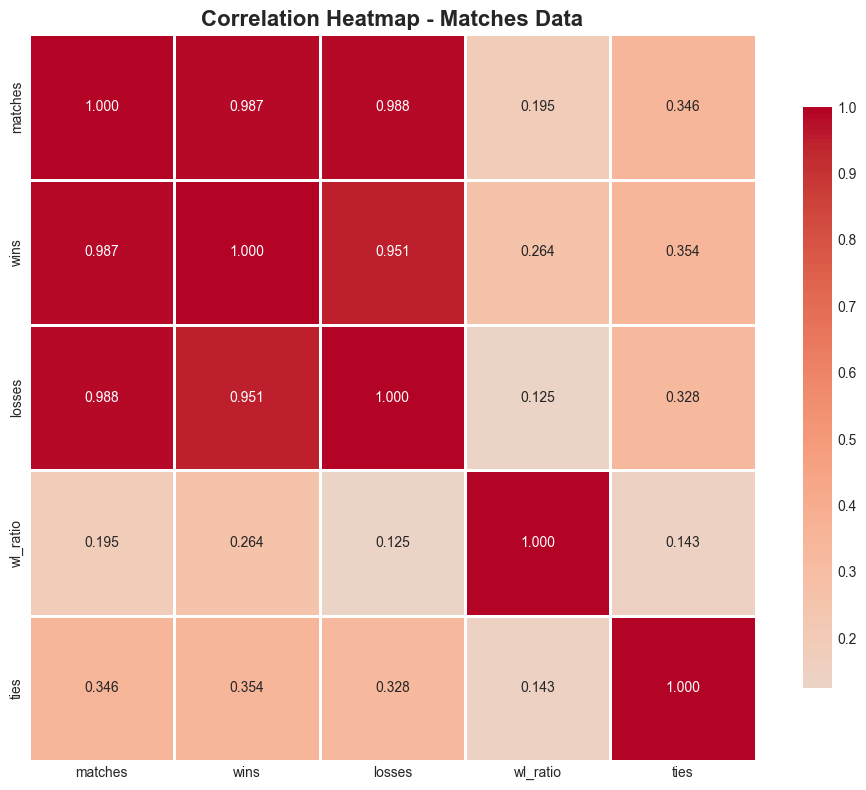


Strongest Correlations:
      var1    var2  correlation
1  matches  losses     0.988473
0  matches    wins     0.986991
4     wins  losses     0.951278
6     wins    ties     0.353607
3  matches    ties     0.346494


In [19]:
# Select numeric columns
numeric_cols = ['matches', 'wins', 'losses', 'wl_ratio', 'ties']
corr_matrix = matches[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Matches Data', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nStrongest Correlations:")
corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_pairs.append({
            'var1': corr_matrix.columns[i],
            'var2': corr_matrix.columns[j],
            'correlation': corr_matrix.iloc[i, j]
        })
corr_df = pd.DataFrame(corr_pairs).sort_values('correlation', ascending=False, key=abs)
print(corr_df.head(5))

## 7. Top 20 Players by Total Matches

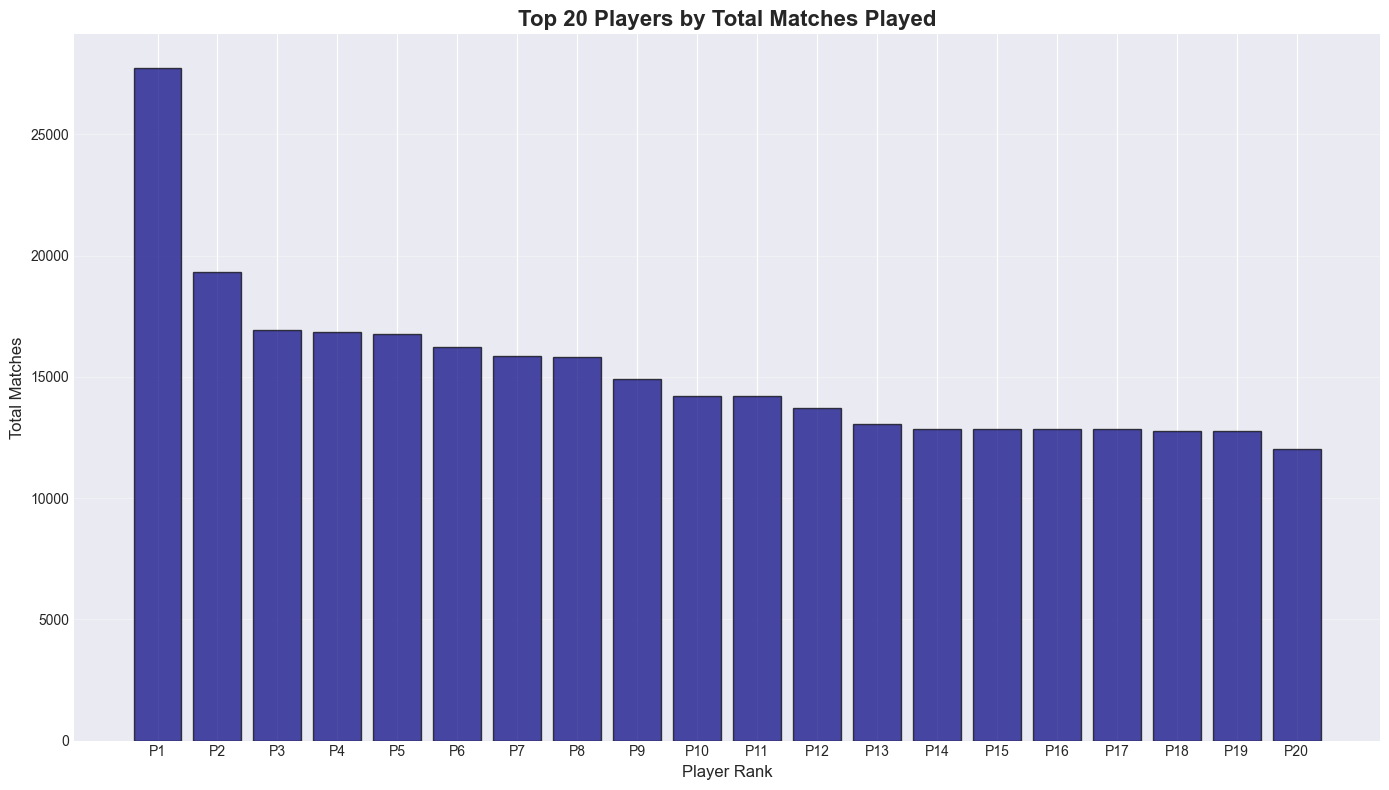

          player_id  matches    wins  losses  wl_ratio
player_d6a1348e4db2  27737.0 10628.0 17103.0      0.62
player_cafecb0f80e7  19327.0  9978.0  9330.0      1.07
player_93a90542cb77  16934.0  6803.0 10126.0      0.67
player_1a18a74e7e74  16841.0  7423.0  9376.0      0.79
player_910764e5a178  16757.0 10138.0  6606.0      1.53
player_166e579b149f  16215.0  8879.0  7333.0      1.21
player_c7065bdd7ffe  15865.0  7105.0  8756.0      0.81
player_64f3fc9bf409  15807.0  9272.0  6532.0      1.42
player_8cbc07752f34  14925.0  7068.0  7844.0      0.90
player_3850dda7b913  14214.0  6841.0  7368.0      0.93
player_c82cbd8215d7  14198.0  9953.0  4242.0      2.35
player_7544568392f2  13706.0  7384.0  6317.0      1.17
player_7ffb0a27dd01  13051.0  6360.0  6681.0      0.95
player_5dd91cbb8910  12859.0  6050.0  6804.0      0.89
player_26d584629d48  12858.0  7914.0  4942.0      1.60
player_fa540b30b08f  12835.0  7961.0  4874.0      1.63
player_ceee959e9253  12832.0  7280.0  5541.0      1.31
player_eb6

In [20]:
top_20 = matches.nlargest(20, 'matches')[['player_id', 'matches', 'wins', 'losses', 'wl_ratio']]

plt.figure(figsize=(14, 8))
x = range(len(top_20))
plt.bar(x, top_20['matches'], alpha=0.7, color='navy', edgecolor='black')
plt.xticks(x, [f"P{i+1}" for i in range(len(top_20))], rotation=0)
plt.title('Top 20 Players by Total Matches Played', fontsize=16, fontweight='bold')
plt.xlabel('Player Rank', fontsize=12)
plt.ylabel('Total Matches', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(top_20.to_string(index=False))

## 8. Win Rate Distribution (Wins / Total Matches)

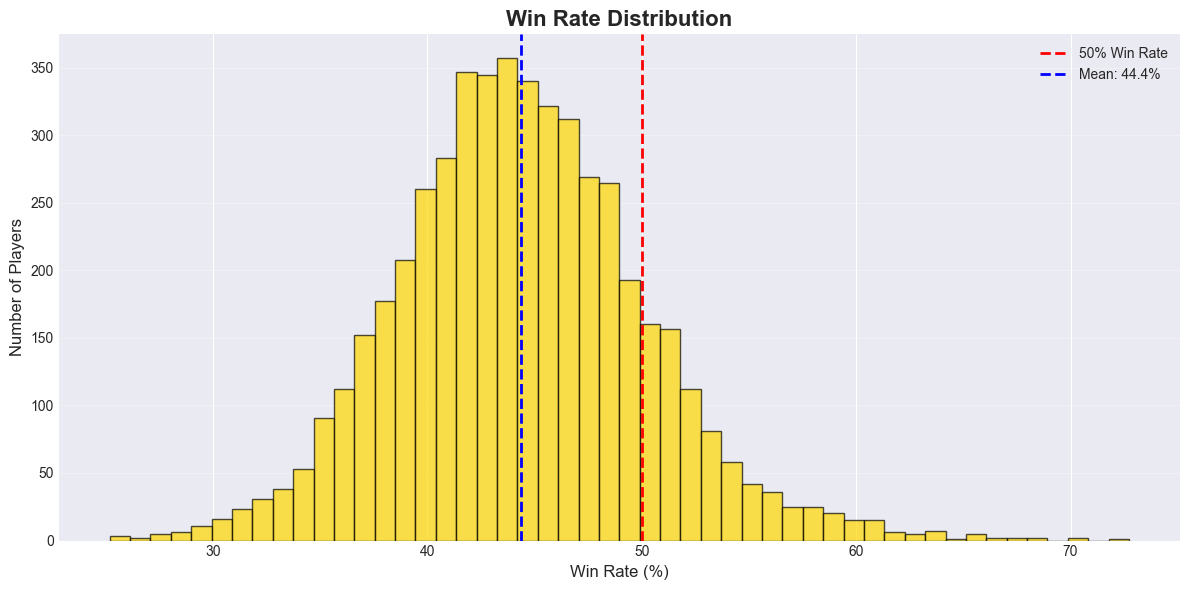

Average Win Rate: 44.39%
Players with >50% win rate: 741 (14.8%)


In [21]:
matches['win_rate'] = (matches['wins'] / matches['matches'] * 100).round(2)

plt.figure(figsize=(12, 6))
plt.hist(matches['win_rate'], bins=50, alpha=0.7, color='gold', edgecolor='black')
plt.axvline(50, color='red', linestyle='--', linewidth=2, label='50% Win Rate')
plt.axvline(matches['win_rate'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {matches["win_rate"].mean():.1f}%')
plt.title('Win Rate Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Win Rate (%)', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Average Win Rate: {matches['win_rate'].mean():.2f}%")
print(f"Players with >50% win rate: {(matches['win_rate'] > 50).sum()} ({(matches['win_rate'] > 50).mean()*100:.1f}%)")

## 9. Experience Buckets Analysis

C:\Users\ofurn\AppData\Local\Temp\ipykernel_20112\865271058.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_stats = matches.groupby('experience')['wl_ratio'].mean().sort_index()


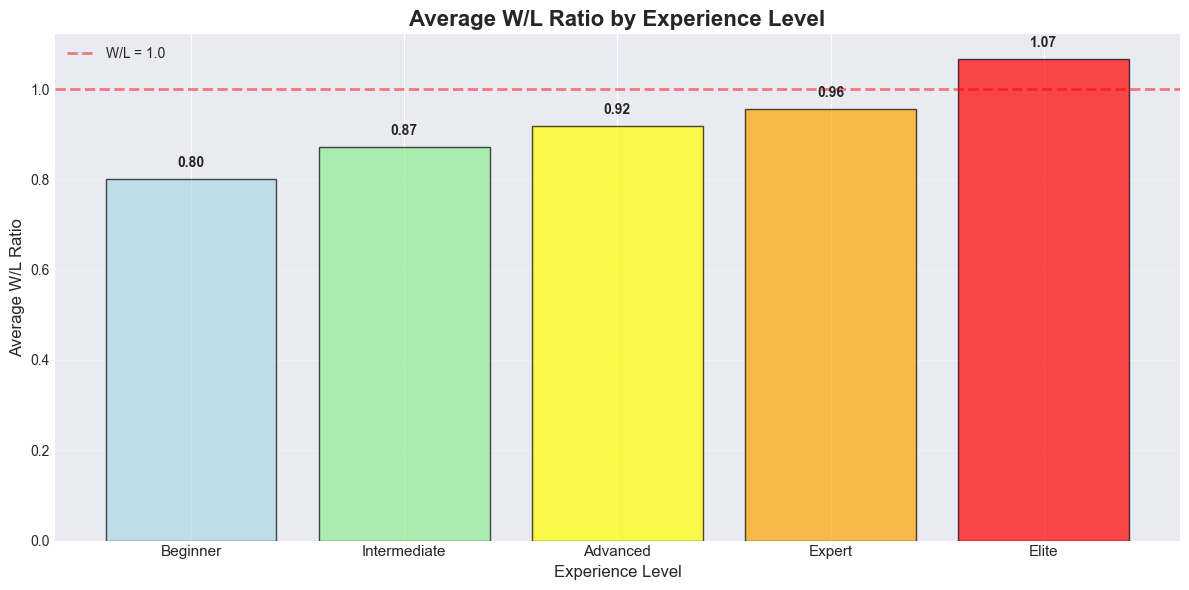


Player Count by Experience:
experience
Beginner        3980
Intermediate     703
Advanced         160
Expert           120
Elite             37
Name: count, dtype: int64


In [22]:
# Create experience buckets
matches['experience'] = pd.cut(matches['matches'], 
                               bins=[0, 1000, 3000, 5000, 10000, 50000],
                               labels=['Beginner', 'Intermediate', 'Advanced', 'Expert', 'Elite'])

# Average W/L by experience
exp_stats = matches.groupby('experience')['wl_ratio'].mean().sort_index()

plt.figure(figsize=(12, 6))
colors = ['lightblue', 'lightgreen', 'yellow', 'orange', 'red']
bars = plt.bar(range(len(exp_stats)), exp_stats.values, color=colors, edgecolor='black', alpha=0.7)
plt.xticks(range(len(exp_stats)), exp_stats.index, fontsize=11)
plt.axhline(1.0, color='red', linestyle='--', linewidth=2, alpha=0.5, label='W/L = 1.0')

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, exp_stats.values)):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.02, f'{val:.2f}', 
             ha='center', va='bottom', fontweight='bold')

plt.title('Average W/L Ratio by Experience Level', fontsize=16, fontweight='bold')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average W/L Ratio', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nPlayer Count by Experience:")
print(matches['experience'].value_counts().sort_index())

## 10. Ties vs Total Matches

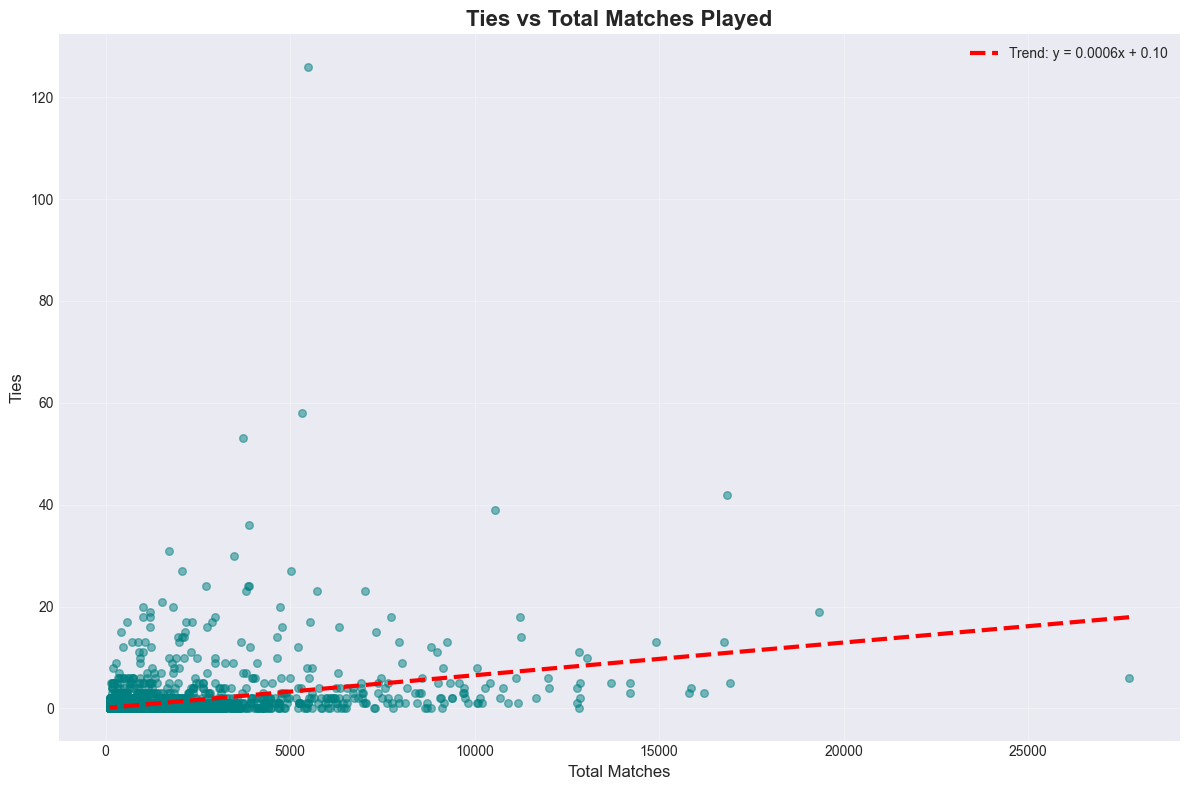

Average Tie Rate: 0.08%
Correlation (Matches vs Ties): 0.346


In [23]:
plt.figure(figsize=(12, 8))
plt.scatter(matches['matches'], matches['ties'], alpha=0.5, s=30, c='teal')

# Regression line
z = np.polyfit(matches['matches'], matches['ties'], 1)
p = np.poly1d(z)
plt.plot(matches['matches'], p(matches['matches']), "r--", linewidth=3, label=f'Trend: y = {z[0]:.4f}x + {z[1]:.2f}')

plt.title('Ties vs Total Matches Played', fontsize=16, fontweight='bold')
plt.xlabel('Total Matches', fontsize=12)
plt.ylabel('Ties', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tie rate
matches['tie_rate'] = (matches['ties'] / matches['matches'] * 100)
print(f"Average Tie Rate: {matches['tie_rate'].mean():.2f}%")
print(f"Correlation (Matches vs Ties): {matches[['matches', 'ties']].corr().iloc[0,1]:.3f}")

## Summary Statistics

In [24]:
print("=" * 80)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("=" * 80)
print(f"\nTotal Players: {len(matches):,}")
print(f"Total Matches Played (All): {matches['matches'].sum():,}")
print(f"Total Wins: {matches['wins'].sum():,}")
print(f"Total Losses: {matches['losses'].sum():,}")
print(f"Total Ties: {matches['ties'].sum():,}")
print(f"\nOverall Win Rate: {(matches['wins'].sum() / matches['matches'].sum() * 100):.2f}%")
print(f"Overall W/L Ratio: {(matches['wins'].sum() / matches['losses'].sum()):.3f}")
print("\nDetailed Statistics:")
print(matches[['matches', 'wins', 'losses', 'wl_ratio', 'ties']].describe())
print("=" * 80)

COMPREHENSIVE SUMMARY STATISTICS

Total Players: 5,000
Total Matches Played (All): 4,351,367.0
Total Wins: 2,023,093.0
Total Losses: 2,324,960.0
Total Ties: 3,314.0

Overall Win Rate: 46.49%
Overall W/L Ratio: 0.870

Detailed Statistics:
            matches          wins        losses     wl_ratio         ties
count   5000.000000   5000.000000   5000.000000  5000.000000  5000.000000
mean     870.273400    404.618600    464.992000     0.820850     0.662800
std     1689.319806    828.091464    881.072713     0.209064     3.130472
min      106.000000     32.000000     45.000000     0.340000     0.000000
25%      163.000000     71.000000     92.000000     0.690000     0.000000
50%      299.000000    131.000000    167.000000     0.790000     0.000000
75%      768.250000    349.000000    422.000000     0.920000     0.000000
max    27737.000000  10628.000000  17103.000000     2.670000   126.000000
